## Algoritmo: Árbol de Decisión (Clasificación)

En este ejemplo se utiliza el algoritmo de clasificación: **Árbol de Decisións** para predecir si comprar o no comprar una casa.

| Variable       | Tipo             | Descripción                                         |
|----------------|------------------|-----------------------------------------------------|
| ingresos       | numérico entero  | Es el ingreso mensual de una familia                |
| gastos_comunes | numérico entero  | Pagos relacionados con servicios públicos y otros gastos mensuales |
| pago_coche     | numérico entero  | Cuota por pago de un auto y gastos de combustible   |
| gastos_otros   | numérico entero  | Gastos relacionados a compras y lo necesario para el mes |
| ahorros        | numérico entero  | Suma de ahorros dispuestos para comprar la casa     |
| vivienda       | numérico entero  | Precio de la vivienda que se quiere comprar         |
| estado_civil   | numérico entero  | 0-Soltero, 1-Casado, 2-Divorciado                   |
| hijos          | numérico entero  | Número de hijos menores de edad                     |
| trabajo        | numérico entero  | 0-Sin empleo, 1-Independiente, 2-Empleado, 3-Empresario, 4-Pareja: autónomos, 5-Pareja: empleados, 6-Pareja: autónomo y asalariado, 7-Pareja: empresario y autónomo , 8-Pareja: empresarios los dos | 
| comprar        | numérico entero  | 0-No comprar 1-Comprar casa (clase)                        |

### Paso 1: Importar las librerias

In [1]:
# Libreria para operaciones matemáticas o estadísticas
import numpy as np
# Libreria para el manejo de datos
import pandas as pd
# Librerias para gráficas
import matplotlib.pyplot as plt
import seaborn as sb
# Libreria para el balanceo de los datos
from sklearn.utils import resample
# Libreria para separar el conjunto de datos en entrenamiento y pruebas
from sklearn.model_selection import train_test_split
# Librería para Arbol de Decisión (clasificación)
from sklearn.tree import DecisionTreeClassifier
# Librerias para métricas del modelo
from sklearn.metrics import precision_score, recall_score, f1_score


### Paso 2: Cargar el archivo plano en un DataFrame

In [2]:
# Se cargan los datos del archivo plano: 1.6-comprar_alquilar.csv a un DataFrame
df = pd.read_csv("data/comprar_alquilar.csv")

### Paso 3: Preprocesamiento de los datos

In [3]:
# Se muestran los primeros 10 registros del DataFrame
df.head(10)

ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   
5      5692             911          11           325    50875    360863   
6      6830            1298         345           309    46761    429812   
7      6470            1035          39           782    57439    606291   
8      6251            1250         209           571    50503    291010   
9      6987            1258         252           245    40611    324098   

   estado_civil  hijos  trabajo  comprar  
0             0      2        2        1  
1             1      3        6        0  
2             2      1        8        1  
3             0      0        3        0  
4             0      0        3        1  
5             1      4        5        1  
6             1      1        5        1  
7             0      0        1        0  
8             0      0        3        1  
9             2      1        7        1

In [4]:
# Se cuentan los datos
df.count()

ingresos          202
gastos_comunes    202
pago_coche        202
gastos_otros      202
ahorros           202
vivienda          202
estado_civil      202
hijos             202
trabajo           202
comprar           202
dtype: int64

In [5]:
# Se identifican los valores NaN del DataFrame
print("Columna       Cantidad NaN")
print(df.isnull().sum(axis = 0))


Columna       Cantidad NaN
ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
comprar           0
dtype: int64


##### NOTA: Como no hay valores NaN en las columnas, no es necesario aplicar 'dropna()' para eliminarlos

### Paso 4: Generar las visualizaciones y estadísticas para los datos

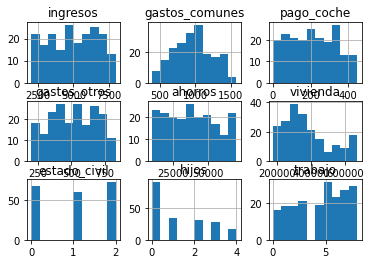

In [6]:
# Se genera el histograma de los datos, pero se excluye la clase (no comprar o comprar)
df.drop(['comprar'], axis=1).hist() # La columna se elimina de manera temporal, es decir solo para la gráfica
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

In [7]:
# Se verifica que todas las columnas están en el DataFrame
df.head()

ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  hijos  trabajo  comprar  
0             0      2        2        1  
1             1      3        6        0  
2             2      1        8        1  
3             0      0        3        0  
4             0      0        3        1

In [8]:
# Se generan las estadísticas del DataFrame
df.describe()

ingresos  gastos_comunes  pago_coche  gastos_otros       ahorros  \
count   202.000000      202.000000  202.000000    202.000000    202.000000   
mean   4958.995050      971.584158  211.742574    515.425743  38749.668317   
std    1682.862556      272.106351  124.940754    168.103075  17365.231870   
min    2008.000000      384.000000    0.000000    201.000000  10319.000000   
25%    3513.750000      766.750000   99.000000    383.250000  24964.250000   
50%    4947.500000      968.000000  208.500000    522.500000  38523.000000   
75%    6374.500000     1165.250000  318.750000    656.750000  52150.750000   
max    7984.000000     1585.000000  448.000000    828.000000  69934.000000   

            vivienda  estado_civil       hijos     trabajo     comprar  
count     202.000000    202.000000  202.000000  202.000000  202.000000  
mean   373349.638614      1.024752    1.232673    4.490099    0.331683  
std    136371.525622      0.837184    1.367833    2.535794    0.471988  
min    176553.000000      0.000000    0.000000    0.000000    0.000000  
25%    274810.000000      0.000000    0.000000    2.000000    0.000000  
50%    340783.500000      1.000000    1.000000    5.000000    0.000000  
75%    444482.000000      2.000000    2.000000    7.000000    1.000000  
max    669540.000000      2.000000    4.000000    8.000000    1.000000

##### Nota: En las estadísticas se puede observar la cantidad de registros, la media, la std, Q1, Q3 y la mediana

### Paso 5: Predicción con el algoritmo Árbol de Decisión (Clasificación) SIN BALANCEO DE DATOS

Antes de predecir es necesario
* Se agrupan los diversos gastos (gastos_comunes, gastos_otros, pago coche)
* Se crea una columna denominada financiar, que resta el precio de la vivienda con los ahorros de la familia
* Luego se eliminan las columnas: gastos_comunes, gastos_otros y pago_coche

Luego,
* Separar los datos de prueba y entrenamiento
* Entrenar el modelo
* Generar la predicción
* Ver las métricas del modelo

In [9]:
# Agrupo los gastos
df['gastos'] = (df['gastos_comunes'] + df['gastos_otros'] + df['pago_coche'])
# Defino financiar
df['financiar'] = (df['vivienda'] - df['ahorros'])
# Elimino las columnas
df = df.drop(['gastos_comunes', 'gastos_otros', 'pago_coche'], axis=1)

# Imprimo las nuevas columnas
df.head(10)

ingresos  ahorros  vivienda  estado_civil  hijos  trabajo  comprar  gastos  \
0      6000    50000    400000             0      2        2        1    1600   
1      6745    43240    636897             1      3        6        0    1496   
2      6455    57463    321779             2      1        8        1    1926   
3      7098    54506    660933             0      0        3        0    1547   
4      6167    41512    348932             0      0        3        1    1606   
5      5692    50875    360863             1      4        5        1    1247   
6      6830    46761    429812             1      1        5        1    1952   
7      6470    57439    606291             0      0        1        0    1856   
8      6251    50503    291010             0      0        3        1    2030   
9      6987    40611    324098             2      1        7        1    1755   

   financiar  
0     350000  
1     593657  
2     264316  
3     606427  
4     307420  
5     309988  
6     383051  
7     548852  
8     240507  
9     283487

In [10]:
# Se deja en X todas las características para el modelo
features = ['ingresos','ahorros','vivienda','estado_civil','hijos','trabajo', 'gastos', 'financiar']
X = df[features]
# Se deja en y la clase (no comprar o comprar) porque es lo que queremos predecir
y = df['comprar'].values

# Dividimos el conjunto de datos en entrenamiento (70%) y pruebas (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7) 

# Creamos el modelo, lo ponemos a aprender con fit() y obtenemos predicciones sobre nuestro conjunto de test
# Se instancia el clasificador 
dtc = DecisionTreeClassifier() 
# Se entrena el modelo
dtc.fit(X_train, y_train)
# Se genera la predicción
prediccion = dtc.predict(X_test)
# Métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, prediccion, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, prediccion, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, prediccion, average='weighted'),2))

Precisión:  0.81
Recall:  0.8
F1-Score:  0.81


In [11]:
# Se genera una predicción de ejemplo

ejemplo = [['6000','50000','400000','0','2','2', '1600', '350000']]

prediccion = dtc.predict(ejemplo)

if prediccion == 1:
    print("Comprar casa:", prediccion)
else:
    print("No comparar casa:", prediccion)

Comprar casa: [1]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Paso 6: Predicción con el algoritmo Árbol de Decisión (Clasificación) CON BALANCEO DE DATOS

In [12]:
# Se cuentan los registros con valor 0 y 1 (es decir no comprar y comprar la casa)
no_comprar = np.sum(df['comprar'] == 0)
comprar = np.sum(df['comprar'] == 1)

print("No comprar =", no_comprar)
print("Comprar =", comprar)

No comprar = 135
Comprar = 67


In [13]:
# Se genera el balanceo de los datos
df_alto = df[df['comprar'] == 0] # Porque hay 135 registros se define alto
df_bajo = df[df['comprar'] == 1]   # Porque hay 67 registros se define bajo

# Aplicamos undersample para dejar los 67 registros en 135
data_resample_bajo = resample(df_bajo,
                replace = True,
                n_samples = 135,
                random_state = 1)
# Se concatenan (unen) los datos df_alto y los del resample
data = pd.concat([df_alto, data_resample_bajo])
# Se observan la cantidad de registros para 0- No comprar y 1-Comprar casa
data['comprar'].value_counts()

0    135
1    135
Name: comprar, dtype: int64

##### Nota: La técnica de balanceo de datos es buena porque evita el sobre entrenamiento del modelo de predicción.

In [14]:
# Se generan las estadísticas del DataFrame
data.describe()

ingresos       ahorros       vivienda  estado_civil       hijos  \
count   270.000000    270.000000     270.000000    270.000000  270.000000   
mean   5292.311111  42089.270370  369569.881481      1.081481    1.381481   
std    1638.901727  16900.221776  128613.556428      0.804743    1.381916   
min    2008.000000  10319.000000  176553.000000      0.000000    0.000000   
25%    3997.250000  28503.000000  283936.000000      0.000000    0.000000   
50%    5659.500000  41475.500000  336885.000000      1.000000    1.000000   
75%    6515.000000  55687.500000  441181.000000      2.000000    3.000000   
max    7984.000000  69934.000000  669540.000000      2.000000    4.000000   

          trabajo     comprar       gastos      financiar  
count  270.000000  270.000000   270.000000     270.000000  
mean     4.829630    0.500000  1692.122222  327480.611111  
std      2.438967    0.500929   323.862625  120200.048747  
min      0.000000    0.000000  1007.000000  154716.000000  
25%      3.000000    0.000000  1415.250000  241176.500000  
50%      5.000000    0.500000  1673.000000  297901.500000  
75%      7.000000    1.000000  1927.500000  384290.250000  
max      8.000000    1.000000  2543.000000  618621.000000

##### Nota: En count, se observan que los datos están balanceados (135 registros para 0- No comprar y 135 registros para 1-Comprar casa)

In [15]:
# Se deja en X todas las características para el modelo
features = ['ingresos','ahorros','vivienda','estado_civil','hijos','trabajo', 'gastos', 'financiar']
X = data[features]
# Se deja en y la clase (no comprar o comprar) porque es lo que queremos predecir
y = data['comprar'].values

# Dividimos el conjunto de datos en entrenamiento (70%) y pruebas (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1) 

# Creamos el modelo, lo ponemos a aprender con fit() y obtenemos predicciones sobre nuestro conjunto de test
# Se instancia el clasificador 
dtc = DecisionTreeClassifier() 
# Se entrena el modelo
dtc.fit(X_train, y_train)
# Se genera la predicción
prediccion = dtc.predict(X_test)
# Métricas clasificación: Precisión, Recall, F1-Score
print("Precisión: ", round(precision_score(y_test, prediccion, average='weighted'), 2))
print("Recall: ", round(recall_score(y_test, prediccion, average='weighted'),2))
print("F1-Score: ", round(f1_score(y_test, prediccion, average='weighted'),2))

Precisión:  0.95
Recall:  0.94
F1-Score:  0.94


##### Nota: Se puede observar que después de balancear los datos y aplicar las otras métricas, el algoritmo árbol de decisión alcanzó 0.92% para la métrica F1 score.

In [16]:
# Se genera la predicción de ejemplo
ejemplo2 = pd.DataFrame({'ingresos':    [6000],
                         'ahorros':      [50000],
                         'vivienda':     [400000],
                         'estado_civil': [0],
                         'hijos':        [2],
                         'trabajo':      [2],
                         'gastos':       [1600],
                         'financiar':    [350000]})

prediccion2 = dtc.predict(ejemplo2)

if prediccion2 == 1:
    print("Comprar casa:", prediccion2)
else:
    print("No comprar casa:", prediccion2)

Comprar casa: [1]
